# Social factors by countries Clustering Analysis - Clustering analysis and visualisations 

This is a personal project to developing my clustering techniques and interpretation using python. The data is sourced from a variety of websites, and so merging and cleaning will be a pivital step in excavating a sound analysis.

The purpose of this project is to deployed data I have scraped off the internet onto a usesable dashboard in PowerBi so that one can survey the factors of each countries. In addition, investigating whether these factors are distinctive enough between the countires to generate accurate clusters, and how within these clusters one can gather useful information. This can be used for personal enjoyment, or to predict the qualities of future countires and determining within which cluster they fit.

The focus on social factors is due to a potential dominating force in other factors such as economic data as these are quite distinctive in their fields and so clustering would be meaningful as it should appear obvious. This is the reason why I choose to harp on the more subtle form of data in social factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [2]:
data = pd.read_csv('social_factors.csv')
data = pd.DataFrame(data)
del data['Unnamed: 0']

Because religion is non-quantitative, it needs to be converted to a numerical factor.

Political stability needs to be positive. This is why every value in the column had its three added to its value.

In [3]:
data['political_stability_2020'] = [item + 3 for item in data['political_stability_2020']]
data['religion'] = data['religion'].map({'christians':1,'muslims':2,'buddhists':3,'unaffiliated':4,'hindus':5,'jews':6,'folkReligions':7})

Perhaps the most interesting and not known metric I have included is the homosexuality score. I believe on which continent or country is most pregressive is not known. For this reason, I will do some elementary analysis for us to survey.

In [7]:
data.groupby('Continent')['homosexuality_score'].mean().sort_values(ascending=False)

Continent
Europe           6.661017
South America    6.416667
North America    3.434783
Oceania          3.200000
Asia             2.307692
Africa           0.836364
Name: homosexuality_score, dtype: float64

In [18]:
data[['Continent','country','homosexuality_score']].sort_values(by = 'homosexuality_score', ascending = False).iloc[0:10]

,Continent,country,homosexuality_score
136,Europe,Germany,10
189,Oceania,Australia,10
130,Europe,Finland,10
131,Europe,France,10
68,Asia,Israel,10
170,North America,Canada,10
140,Europe,Ireland,10
164,Europe,United Kingdom,10
162,Europe,Switzerland,10
161,Europe,Sweden,10


In [19]:
data[['Continent','country','homosexuality_score']].sort_values(by = 'homosexuality_score', ascending = True).iloc[0:10]

,Continent,country,homosexuality_score
0,Africa,Algeria,0
30,Africa,Malawi,0
32,Africa,Mauritania,0
88,Asia,Qatar,0
34,Africa,Morocco,0
85,Asia,Oman,0
38,Africa,Nigeria,0
82,Asia,Maldives,0
40,Africa,Sao Tome and Principe,0
41,Africa,Senegal,0


There is no basis to judge, but evidence is clear that people identifying with LGBT identity have different lives across the globe. Those living in Africa are likely not as open as say Europe where higher homosexuality is ubiquitdous. Australia scores 10. How about visualisations.

In [25]:
fig = px.scatter(data, x="homosexuality_score", y="country", color="Continent",
                 size='political_stability_2020', hover_data=['homosexuality_score'])
fig.show()


Already there appears to show some hint of clustering in the data. However, not massive, there is a clear distinctive, for example, between the countires in Europe and Asia. They population around certain areas in the scale, and therefore, a countries within that area could be, in theory, be identify. Yet, there is clear overlap, as our table above already show. North America and Oceania are nearly identify. 

One thing I found interesting was the low score for North America. I think many people including myself think of NA as the United States and Canada who are universally progressive. Yet it is not. Countries such as Dominca and the Bahamas are included as well. For this reason, the score may seem different from expectation, at least at my end.

It is also interesting to look the outliers for the data. For example, overperforming coutry in Isreal for Asia, and South Africa for Africa. The best performing for North America is the US, and for Oceania is Australia and New Zealand.

In [24]:
fig = px.scatter(data, x="crimeIndex", y="country", color="Continent",
                 size='political_stability_2020', hover_data=['crimeIndex'])
fig.show()

In the case of crime index, clustering is needed forming. Europe for example shows overall a low score (good). Interesting the most dangerous in terms of this metric are Belarus and France.

The three most "safe" coutries are Qatar, United Arah Emirates, and Oman. Interesting situation in Asia yet universally identify as Middle Eastern countries. Which are perspective by people or media outlets as 'hostile and volitile' environment due to the perception of perpetual war. 

However, one thing to note, and could be a point of concern it is abundance of countries overlapping each other. This is due to the lack of data from the original source, and therefore the transformation I applied in the cleaning process. This could affect the clustering and cause dishonesty. But we will see.

In [50]:
fig = px.scatter(data, x="protein_supply_2017", y="country", color="Continent",
                 size='food_insecurity_2017', hover_data=['protein_supply_2017'])
fig.show()


This problem is showing up again. This is obvious in the continents of Africa and Asia. Reguardless it is interesting. This data relates to the supply of animal protein. 

The countires with the most supply are Iceland, China, and Isreal. It would be interesting to know the ratio of domestic produce and imports. Iceland, for example, is not the first thing to come to mind when you think of globalisation, but China is. Iceland being a far outlier is interesting to say the least. Unfortunetaly the countries in Africa are both high in protein supply and high in food insecurity. The reasons are beyond the scope of this project, and unfortunately as expected outcome for many.

In [21]:
fig = px.scatter(data, x="obesity_2016", y="country", color="Continent", hover_data=['obesity_2016'])
fig.show()


Going off the previous graph and results, it is expected to find countries in Africa showing low obesity percentages across the board. Interestingly the most obese coutries are from Oceania, and more specfically the Polynesian areas such as Palau, Naura, and the Marshall Islands.This is interesting to find when considering they did not show overpeformance in protein supply yet overpopulate the high obesity scale.

In [24]:
fig = px.scatter(data, x="happiness2021", y="country", color="Continent", hover_data=['happiness2021'])
fig.show()



Happiness is an interesting metric because it is a medley of many factors. As expected contries in Europe are generally more pleased. The top three being there. The most unhappy countries are Afghanistan, Zimbabwe, and Rwanda. Clustering is somewhat shown here. However this is due to the overlapping due to the data cleaning. This may skew out output and create very obvious clusters, which is not out goal.

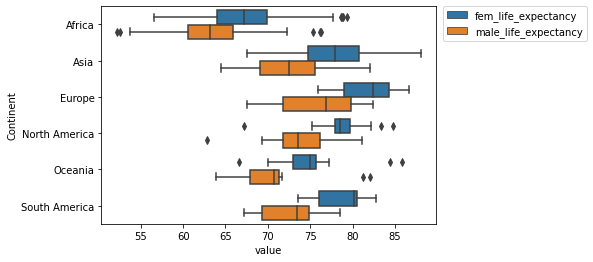

In [38]:
df = pd.melt(data, id_vars='Continent', value_vars=['fem_life_expectancy', 'male_life_expectancy'])

sns.boxplot(data=df, x="value", y="Continent", hue="variable")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Generally females in their respective countries tend to outlive their male counterparts. People in Europe tend to live more longer.Individuals in Africa unfortunately live the lowest across both sexes across the continents.

## Machine Learning and Clustering Analysis

The first step in the process is scaling the data using the MinMax transformer. This converts the data to fall within the range of [0,1]. This preserves the shape of the data but it scales the data so that it in measured on the same scale.

In [105]:
from sklearn import preprocessing

info = data.drop(['Continent', 'country'], axis=1)
scaler = preprocessing.MinMaxScaler()
data_transform = scaler.fit_transform(info)
data_transform = pd.DataFrame(data_transform)
data_transform.columns = info.columns

At this stage, I want to know which variables in the dataset is the most importance. To do this I will use the random forest classifier to then rank the level of importance.

In [117]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(data_transform,pd.get_dummies(data['Continent']))

RandomForestRegressor()

<BarContainer object of 14 artists>

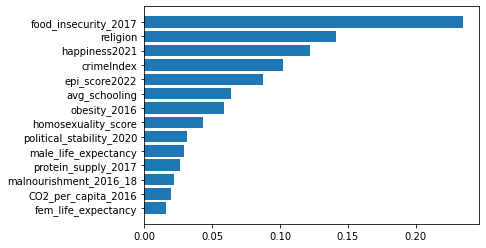

In [121]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(info.columns[sorted_idx], rf.feature_importances_[sorted_idx])


In [131]:
fig = px.scatter(data, x="happiness2021", y="country", color="Continent", hover_data=['happiness2021'])
fig.show()


As expected from the previous assumption of happiness potenially being a clear determiner for prediction due to its distinctive overlapping in specific areas different to one another. For this reason, and for the sake of an more robust analysis this should be remove, otherwise identifying countries within their cluster would prove too much of an easy task.

In [134]:
fig = px.scatter(data, x="crimeIndex", y="country", color="Continent", hover_data=['crimeIndex'])
fig.show()

The same issue happens for crime. This is quite clear in Africa having one big overlapping entry. This shows the original source was insufficeint, at least for Africa, in terms of data collecting. The same rationale for happiness will be used for crime index.

In [133]:
fig = px.scatter(data, x="epi_score2022", y="country", color="Continent", hover_data=['epi_score2022'])
fig.show()

This is an example of a more healthy data spread.

Religion will also be removed beacause it shows no variety as many countries represent Christianity, and therefore accomplishes nothing.

To withold the intergrity of the study, these variables are best removed.

In [4]:
from sklearn import preprocessing

info = data.drop(['Continent', 'country','crimeIndex','happiness2021','food_insecurity_2017','religion'], axis=1)
scaler = preprocessing.MinMaxScaler()
data_transform = scaler.fit_transform(info)
data_transform = pd.DataFrame(data_transform)
data_transform.columns = info.columns

<BarContainer object of 10 artists>

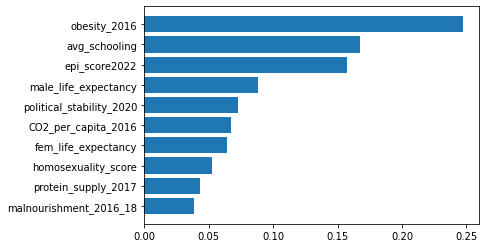

In [5]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(data_transform,pd.get_dummies(data['Continent']))

sorted_idx = rf.feature_importances_.argsort()
plt.barh(info.columns[sorted_idx], rf.feature_importances_[sorted_idx])

These are the final variables I will be progressing with the analysis.

Because we are handling with many variables, it is desirable to do a PCA. This reduces to the dimensionality of the data and makes explaining the data a lot of manageable while also tolerating outliers.

## PCA graph with two components

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_transform)

In [9]:
fig = px.scatter(x_pca, x = 0,y=1, color = data['Continent'])
fig.show()

Looking at the clusters at the PCA there is some hint of pattern. Although appearing like a mess, there is are a couple of interesting observations. To point out the pressing clusters, Europe and Africa show distinctive clusters being on the polar opposites of the scale. The rest however are observably messed together. But, Asia for example, shows a downward incline from about -0.6 to 0.4. South America is somewhat perpendicular to this intercepting at about 0. Reguardless, how would a clustering classifier visualise this.


The Clustering method I will use is K-means. This is a process which uses a centroid to categorise data based on distance. I will first use baseline inputs with 5 clusters and 2 components as a simple visualisation, but for optimization these inputs will be analysed and further tests will be deployed to maxmise the clustering compactness and variance explanation. Idealliy we are looking for the clusters to explained 95% of the varience.

<Figure size 432x288 with 0 Axes>

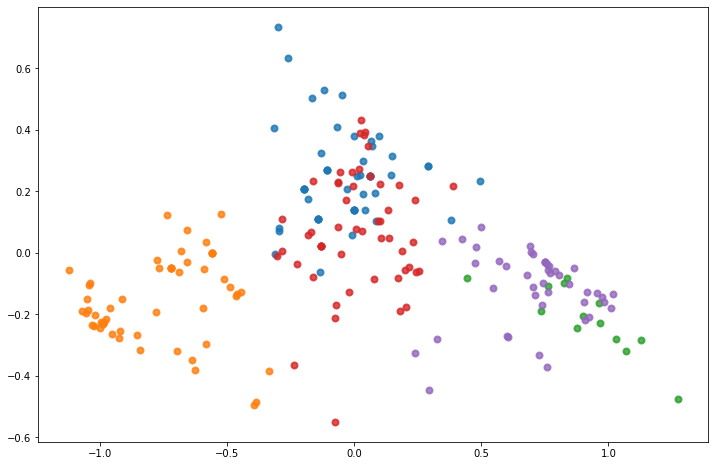

 Explained variance ratio for first two compoentns: [0.66547859 0.09848589]


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)
kmeans = kmeans.fit(data_transform)

predictions = kmeans.predict(data_transform)

pca = PCA(n_components=2)
x_pca = pca.fit(data_transform).transform(data_transform)


plt.figure()
plt.figure(figsize = (12,8))
lw = 2

target_names = ['cluster 0','cluster 1', 'cluster 2','cluster 3','cluster 4']

for i, targetname in zip([0,1,2,3,4],target_names):
    plt.scatter(x_pca[predictions == i,0],x_pca[predictions == i,1], alpha = .8, lw = lw, label = targetname)

plt.show()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print(" Explained variance ratio for first two compoentns: " + str(pca.explained_variance_ratio_))


Looking at the PCA 

In [240]:
data_transform['clusters'] = predictions

In [209]:
data_transform.columns

Index(['CO2_per_capita_2016', 'epi_score2022', 'fem_life_expectancy',
       'male_life_expectancy', 'homosexuality_score', 'avg_schooling',
       'malnourishment_2016_18', 'protein_supply_2017',
       'political_stability_2020', 'obesity_2016', 'clusters'],
      dtype='object')

<AxesSubplot:xlabel='political_stability_2020', ylabel='obesity_2016'>

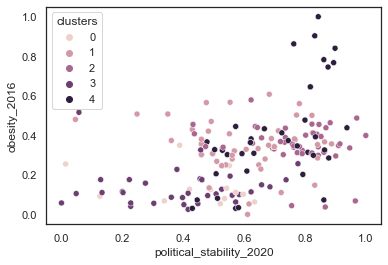

In [241]:
sns.scatterplot(x = 'political_stability_2020', y = 'obesity_2016', hue = 'clusters', data = data_transform)

<AxesSubplot:xlabel='political_stability_2020', ylabel='obesity_2016'>

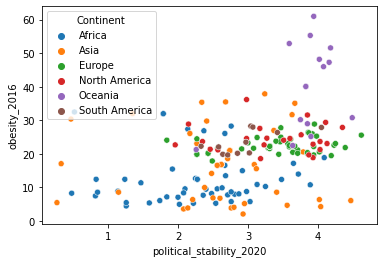

In [214]:
sns.scatterplot(x = 'political_stability_2020', y = 'obesity_2016', hue = 'Continent', data = data)

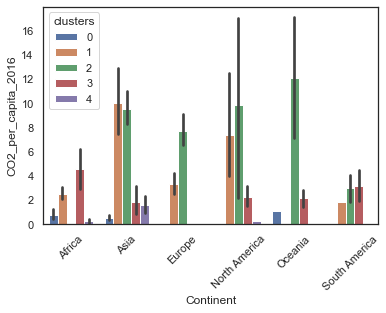

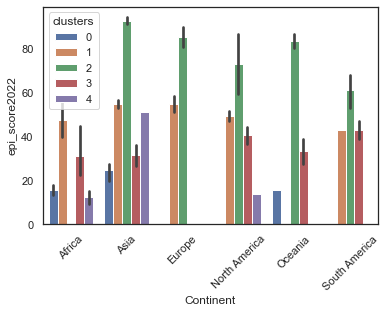

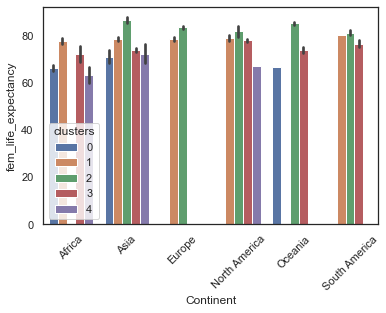

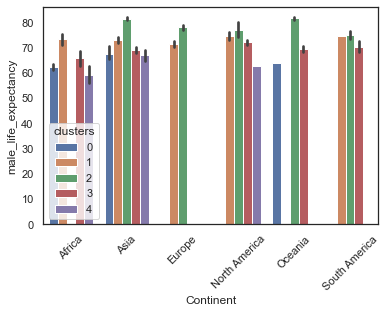

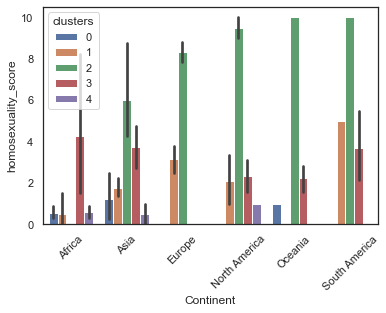

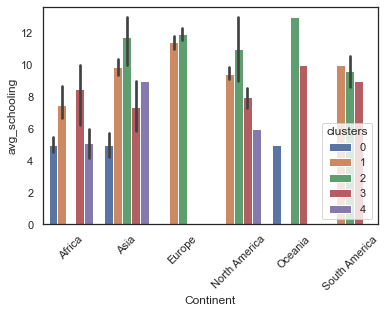

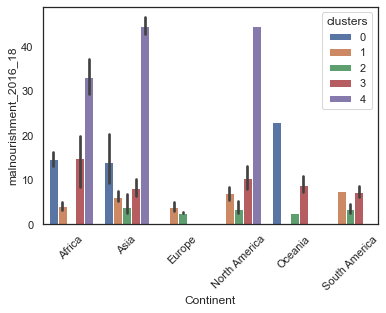

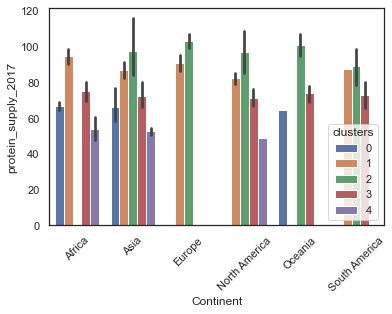

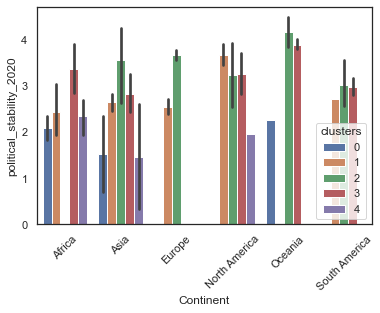

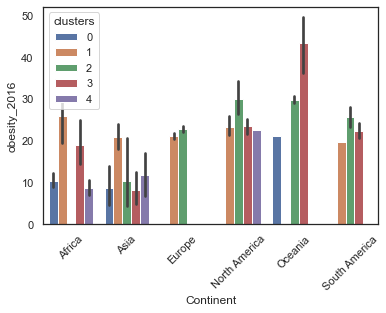

In [249]:
sns.set(style='white')

cols = ['CO2_per_capita_2016', 'epi_score2022', 'fem_life_expectancy',
       'male_life_expectancy', 'homosexuality_score', 'avg_schooling',
       'malnourishment_2016_18', 'protein_supply_2017',
       'political_stability_2020', 'obesity_2016']

for item in cols:
    plt.figure()
    sns.barplot(x='Continent', y=item, hue='clusters', data=data) 
    plt.xticks(rotation=45)
    plt.show